# Iris Data Set 

https://archive.ics.uci.edu/ml/datasets/iris

Attribute Information: <br>

1. sepal length in cm <br>
2. sepal width in cm <br>
3. petal length in cm <br>
4. petal width in cm <br>
5. class: <br>
-- Iris Setosa <br>
-- Iris Versicolour <br>
-- Iris Virginica <br>



In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" , delimiter=',' 
                         , skipinitialspace=True, header=None
                        , names = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Iris-Class"])


In [2]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Iris-Class       0
dtype: int64

In [5]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Iris-Class        object
dtype: object

In [6]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data["Iris-Class"].nunique()

3

In [8]:
data["Iris-Class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
data.groupby('Iris-Class').size()

Iris-Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

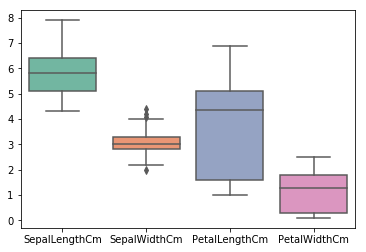

In [10]:
# box and whisker plots#
#data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
#plt.show()

ax = sns.boxplot(data=data, orient="v", palette="Set2")
plt.show()

In [11]:
numeric_features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

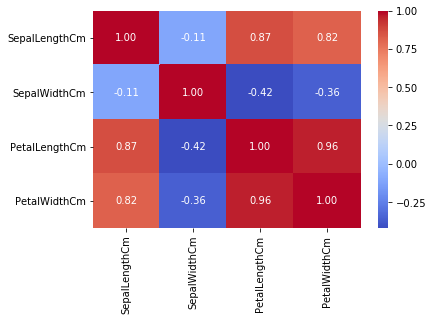

In [12]:
g = sns.heatmap(data[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

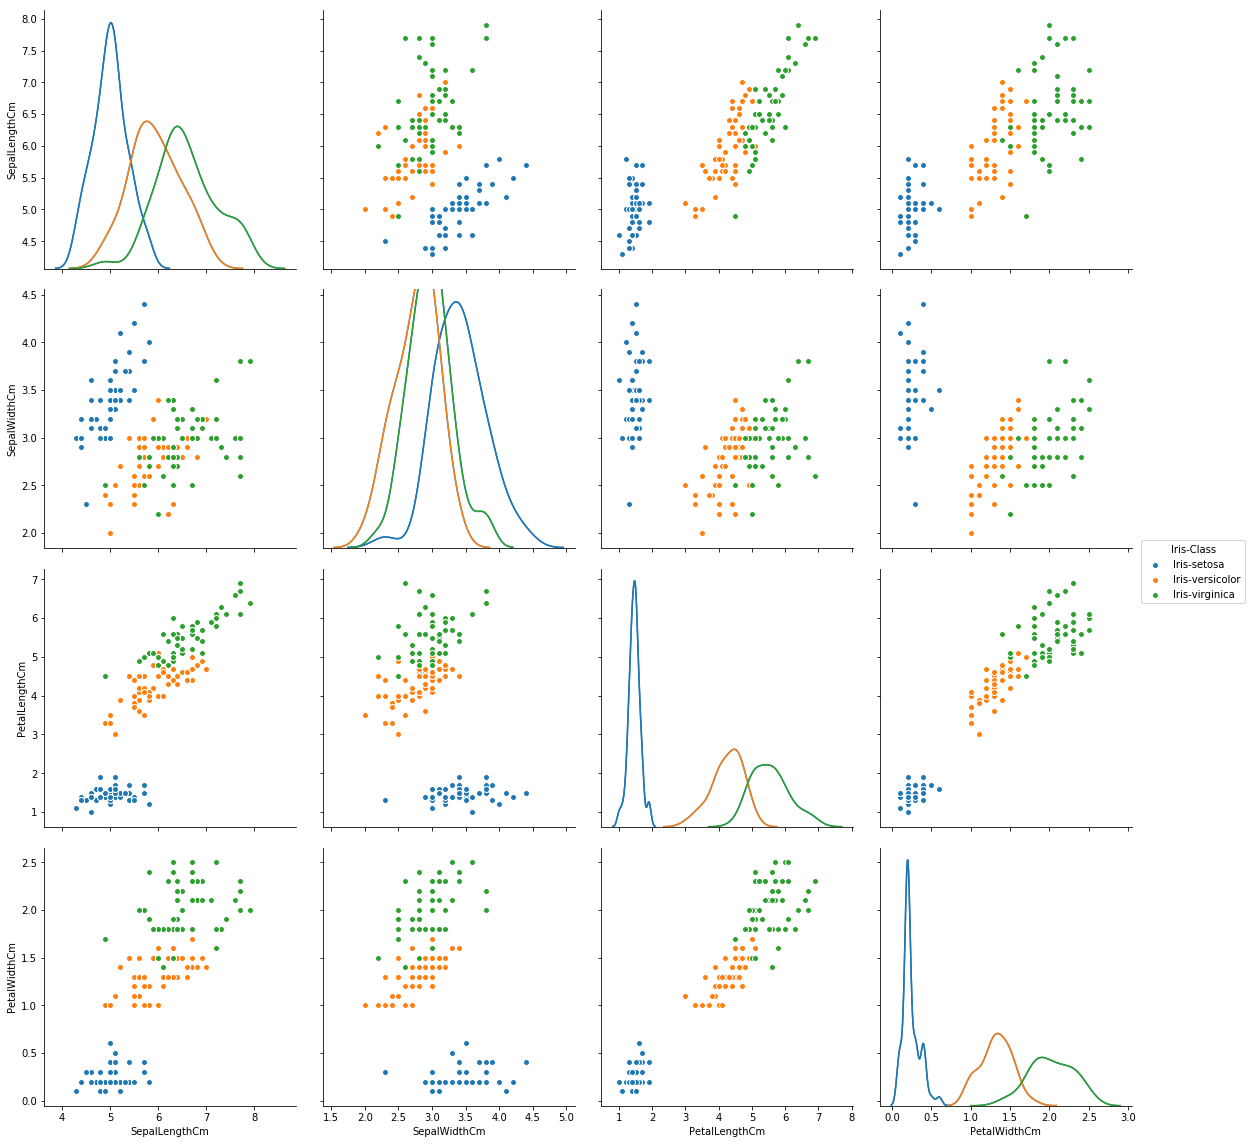

In [13]:



g = sns.pairplot(data, hue="Iris-Class", size=4, diag_kind="kde")

def f(x, **kwargs):
    kwargs.pop("color")
    col = next(plt.gca()._get_lines.prop_cycler)['color']
    sns.kdeplot(x, color=col, **kwargs)
    
g.map_diag(f)    
plt.show()

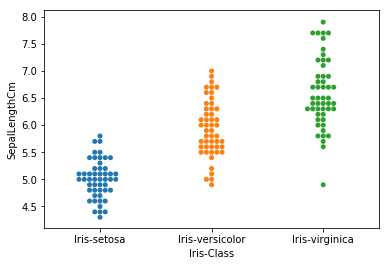

In [14]:
#Count Iris-Class

sns.swarmplot(x=data["Iris-Class"], y=data["SepalLengthCm"], data=data)
#sns.countplot(train_data['income'],label="Count",palette="RdBu")
plt.show()

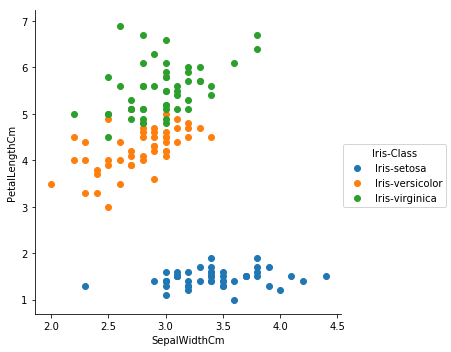

In [15]:
sns.FacetGrid(data, hue="Iris-Class", size=5) \
   .map(plt.scatter, "SepalWidthCm", "PetalLengthCm") \
   .add_legend()

plt.show()

In [16]:
#Preparing for classification
data['Iris-Class']=data['Iris-Class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

# array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# 0 for setosa

# 1 for versicolor

# 2 for verginica

In [17]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
X = data.values[:,0:3]
Y = data.values[:,4]




In [19]:
from sklearn.linear_model import LogisticRegression, SGDClassifier #1
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB #2 3 4
from sklearn.tree import DecisionTreeClassifier # 5
from sklearn import svm #6
from sklearn.linear_model import SGDClassifier # 7
from sklearn.neighbors import KNeighborsClassifier # 8
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # 9 10
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # 11

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn import preprocessing


from sklearn.model_selection import cross_val_score
from statistics import mean

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



In [20]:

# train/test 80/20
validation_size = 0.2
seed = 10
num_folds = 5
scoring = 'accuracy'

X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,
    test_size=validation_size,random_state=seed)

# Params for Random Forest
num_trees = 100
max_features = 3



models = []

models.append(('LR', LogisticRegression())) # 1 
# naive bayes
models.append(('M-NB', MultinomialNB())) # 2
models.append(('G-NB', GaussianNB())) # 3
models.append(('B-NB', BernoulliNB())) # 4 

models.append(('DTC', DecisionTreeClassifier(criterion='gini'))) # 5
models.append(('SVM', svm.SVC())) # 6
models.append(('SGD', SGDClassifier())) # 7
models.append(('KNN', KNeighborsClassifier())) # 8


# Ensemble
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))) # 9
models.append(('GBC', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0))) # 10

models.append(('LDA', LinearDiscriminantAnalysis())) #11




# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "Accuracy for %s: %f (%0.2f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Accuracy for LR: 0.900000 (0.09)
Accuracy for M-NB: 0.725000 (0.16)
Accuracy for G-NB: 0.866667 (0.08)
Accuracy for B-NB: 0.250000 (0.08)
Accuracy for DTC: 0.900000 (0.07)
Accuracy for SVM: 0.950000 (0.06)
Accuracy for SGD: 0.675000 (0.21)
Accuracy for KNN: 0.933333 (0.06)
Accuracy for RF: 0.941667 (0.05)
Accuracy for GBC: 0.908333 (0.04)
Accuracy for LDA: 0.958333 (0.04)


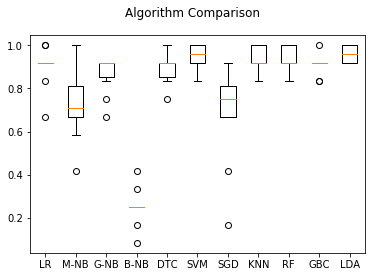

In [21]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [22]:
# scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train2 = scaler.fit_transform(X_train)
X_test2 = scaler.transform(X_validation)


BNBModel = BernoulliNB()
# check the accuracy
# the data is split 5 times
scores = cross_val_score(BNBModel, X_train2, Y_train, cv=5)
print("Accuracy for BernoulliNB: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

Accuracy for BernoulliNB: 0.74 (+/- 0.13)
[ 0.64        0.72        0.79166667  0.82608696  0.73913043]


In [23]:
#ax = sns.boxplot(x="names", y="total_bill", data=results)
#plt.show()

In [24]:
# Finalize Model 
#Candidate model is SVM KNN RF
random_forest = RandomForestClassifier(n_estimators=250, max_features=1)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy: 93.3333333333%
[[10  0  0]
 [ 0 12  1]
 [ 0  1  6]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        10
        1.0       0.92      0.92      0.92        13
        2.0       0.86      0.86      0.86         7

avg / total       0.93      0.93      0.93        30

